# ANN CLASSIFICATION - {"CUSTOMER CHURN" DATASET}

## 1. Importing Modules and Setting Configurations

In [1]:
import numpy as np
import tensorflow as tf
import random as rn

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'
rn.seed(1254)
np.random.seed(37)
tf.random.set_seed(89)

# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph = tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

tf.compat.v1.set_random_seed(12)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# tf.keras.utils.set_random_seed(1)
# tf.config.experimental.enable_op_determinism()

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout

import keras_tuner as kt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from pickle import dump, load

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

In [4]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

In [5]:
# SB Options

sb.set_theme(context='notebook', style='whitegrid', palette='pastel', font='times new roman', font_scale=1.25)

## 2. Importing Dataset

### 2.1 Train Dataset

In [6]:
tr = pd.read_pickle('cc_train_fe.pkl')


print(f'Shape of the train dataset : {tr.shape}')
tr.head(5)

Shape of the train dataset : (6960, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1465,0.1024,-0.3034,-0.0452,-0.0456,-0.9278,-0.9282,1.0174,1.0155,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.1349,1.2493,-1.5019,0.7618,0.7619,0.9893,0.9899,-0.1726,-0.1727,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5194,-1.4436,-0.3034,-1.1638,-1.1640,-0.0775,-0.0765,-0.8682,-0.8695,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.4219,-0.9316,-0.3034,1.3034,1.3031,-0.2460,-0.2464,-1.6139,-1.6154,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5194,1.3354,-0.3034,0.8415,0.8416,0.1350,0.1358,-0.6571,-0.6551,0


In [7]:
Xtr = tr.drop(columns='churn')
ytr = tr['churn']

In [8]:
#Xtr = tensorflow.convert_to_tensor(Xtr, dtype = tensorflow.float32)

In [9]:
Xtr

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1066,1.1465,0.1024,-0.3034,-0.0452,-0.0456,-0.9278,-0.9282,1.0174,1.0155
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2521,-1.1349,1.2493,-1.5019,0.7618,0.7619,0.9893,0.9899,-0.1726,-0.1727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0506,0.2410,-0.0559,-0.3034,-0.7597,-0.7597,2.0010,2.0006,0.0896,0.0912
6959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1839,1.6305,1.1904,-0.3034,0.2472,0.2476,-0.5089,-0.5081,0.0599,0.0599


### 2.2 Validation Dataset

In [10]:
val = pd.read_pickle('cc_valid_fe.pkl')

print(f'Shape of the train dataset : {val.shape}')
val.head(5)

Shape of the train dataset : (100, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0125,1.1777,-1.5019,-1.3307,-1.3310,0.1250,0.1240,-1.4933,-1.4948,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4219,0.5662,-0.3034,-0.3513,-0.3511,-0.7333,-0.7324,-0.9526,-0.9544,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.1349,-0.6725,-0.3034,-0.3884,-0.3882,0.1972,0.1972,-0.5666,-0.5658,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0125,0.0744,0.5730,0.7506,0.7510,-0.8817,-0.8811,-0.2551,-0.2531,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0125,0.4533,-0.3034,-0.0452,-0.0456,-0.5027,-0.5036,-0.7898,-0.7891,0.0


In [11]:
Xval = val.drop(columns='churn')
yval = val['churn']

In [12]:
#Xval = tensorflow.convert_to_tensor(Xval, dtype = tensorflow.float32)

In [13]:
Xval

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1749,-0.0125,1.1777,-1.5019,-1.3307,-1.3310,0.1250,0.1240,-1.4933,-1.4948
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5616,0.4219,0.5662,-0.3034,-0.3513,-0.3511,-0.7333,-0.7324,-0.9526,-0.9544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0826,-1.1349,-1.0807,-0.3034,0.5392,0.5393,2.9505,2.9505,0.9128,0.9127
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.1568,0.8041,-0.1623,-1.5019,1.0103,1.0107,-1.8723,-1.8720,-0.4440,-0.4452


## 3. Model Comparison

### 3.1 Models

In [14]:
# model:1 
def model21():
    model = Sequential()
    model.add(Dense(40, activation='relu', input_dim=69))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

mdl21 = model21()

# model:2
def model22():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=69))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

mdl22 = model22()

# model:3
def model23():
    model = Sequential()
    model.add(Dense(48, activation='tanh', input_dim=69))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

mdl23 = model23()

In [15]:
# model:4 
def model31():
    model = Sequential()
    model.add(Dense(40, activation='linear', input_dim=69))
    model.add(Dropout(0.4))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

mdl31 = model31()

# model:5 
def model32():
    model = Sequential()
    model.add(Dense(56, activation='relu', input_dim=69))
    model.add(Dropout(0.3))
    model.add(Dense(56, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

mdl32 = model32()

# model:6 
def model33():
    model = Sequential()
    model.add(Dense(40, activation='relu', input_dim=69))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

mdl33 = model33()

In [16]:
# model:7 
def model41():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=69))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='linear'))
    model.add(Dropout(0.5))
    model.add(Dense(24, activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

mdl41 = model41()

# model:7 
def model42():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=69))
    model.add(Dropout(0.1))
    model.add(Dense(40, activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(24, activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

mdl42 = model42()

In [17]:
models = {
    'mdl21':mdl21,
    'mdl22':mdl22,
    'mdl23':mdl23,
    'mdl31':mdl31,
    'mdl32':mdl32,
    'mdl33':mdl33,
    'mdl41':mdl41,
    'mdl42':mdl42
} 

### Models Evaluation

In [18]:
def eval_models(models, Xtr, ytr, Xval, yval):
    mdl_list = []
    tr_list = []
    val_list = []
    
    for name in models.keys():
        
        mdl_name = name
        mdl_nn = models[name]
        
        print(mdl_name, mdl_nn)

        print(f'Model Name : {mdl_name} ____________________________________________________________________________________ \n')
        #mdl_nn.summary()

        mdl_nn.fit(Xtr, ytr, epochs=10, verbose=0, validation_data=(Xval,yval)) 

        # Train and Validation Dataset Accuracy
        yhat_tr = mdl_nn.predict(Xtr, verbose=0)
        yhat_val = mdl_nn.predict(Xval, verbose=0)
        yhat_tr = np.where(yhat_tr > 0.5,1,0)
        yhat_val = np.where(yhat_val > 0.5,1,0)

        tr_acc = round(accuracy_score(ytr,yhat_tr)*100,4)
        pred_val = [yhat_val[x][0] for x in range(yhat_val.shape[0])]
        val_acc = round(accuracy_score(yval.tolist(),pred_val)*100,4)
        
        mdl_list.append(mdl_name)
        tr_list.append(tr_acc)
        val_list.append(val_acc)
    
    return mdl_list, tr_list, val_list

In [19]:
m,t,v = eval_models(models, Xtr, ytr, Xval, yval)

mdl21 <keras.engine.sequential.Sequential object at 0x000001CE73F4ABC0>
Model Name : mdl21 ____________________________________________________________________________________ 

mdl22 <keras.engine.sequential.Sequential object at 0x000001CE73F4AC80>
Model Name : mdl22 ____________________________________________________________________________________ 

mdl23 <keras.engine.sequential.Sequential object at 0x000001CE74376500>
Model Name : mdl23 ____________________________________________________________________________________ 

mdl31 <keras.engine.sequential.Sequential object at 0x000001CE74851780>
Model Name : mdl31 ____________________________________________________________________________________ 

mdl32 <keras.engine.sequential.Sequential object at 0x000001CE74850250>
Model Name : mdl32 ____________________________________________________________________________________ 

mdl33 <keras.engine.sequential.Sequential object at 0x000001CE748B9150>
Model Name : mdl33 ___________________

### 3.3 Comparison Results

In [20]:
mdl_perf = pd.DataFrame(data={'ANN_Model':m, 'Train_Acc':t, 'Val_Acc':v}).sort_values(['Val_Acc'], ascending=False)
mdl_perf['Diff_Acc'] = (mdl_perf['Train_Acc']-mdl_perf['Val_Acc'])
mdl_perf

,ANN_Model,Train_Acc,Val_Acc,Diff_Acc
4,mdl32,92.7443,94.0,-1.2557
0,mdl21,90.6466,93.0,-2.3534
1,mdl22,88.2902,92.0,-3.7098
2,mdl23,86.0920,92.0,-5.9080
5,mdl33,92.4569,92.0,0.4569
6,mdl41,91.2644,92.0,-0.7356
7,mdl42,92.3420,92.0,0.3420
3,mdl31,87.7011,87.0,0.7011


### 3.4 Selecting Model where Train and Validation Accuracy Difference is less than 1%.

In [21]:
filt = ((mdl_perf['Diff_Acc'] >= 0) & (mdl_perf['Diff_Acc'] <= 1.0))
mdl_df = mdl_perf.loc[filt].sort_values(['Diff_Acc'])
mdl_df

,ANN_Model,Train_Acc,Val_Acc,Diff_Acc
7,mdl42,92.3420,92.0,0.3420
5,mdl33,92.4569,92.0,0.4569
3,mdl31,87.7011,87.0,0.7011


## 4. Best Model Training and Evaluation on Train/Validation Data

### 4.1 Best Model

In [22]:
# idx = mdl_df['Diff_Acc'].argmin()
# #idx = mdl_perf['Val_Acc'].argmax()

# best_mdl_name = mdl_df.iloc[idx,0]
# #best_mdl_name = mdl_perf.iloc[idx,0]

# print(f'Best Model : {best_mdl_name} \n')

# best_mdl = models[best_mdl_name]
# best_mdl.summary()

In [23]:
def model33():
    model = Sequential()
    model.add(Dense(40, activation='relu', input_dim=69))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

best_mdl = model33()
best_mdl.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                2800      
                                                                 
 dropout_15 (Dropout)        (None, 40)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                1312      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,145
Trainable params: 4,145
Non-trainable params: 0
_________________________________________________________________


### 4.2 Model Training

In [24]:
hst = best_mdl.fit(Xtr, ytr, epochs=10, verbose=0, validation_data=(Xval,yval))

### 4.3 Model Training History

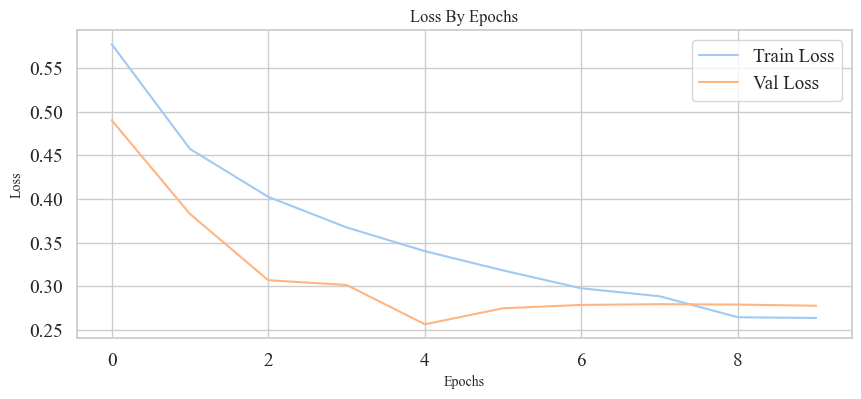

In [25]:
plt.figure(figsize=(10,4))

plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])

plt.title('Loss By Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=10)
plt.xlabel('Epochs',fontsize=10)
plt.legend(['Train Loss','Val Loss'])

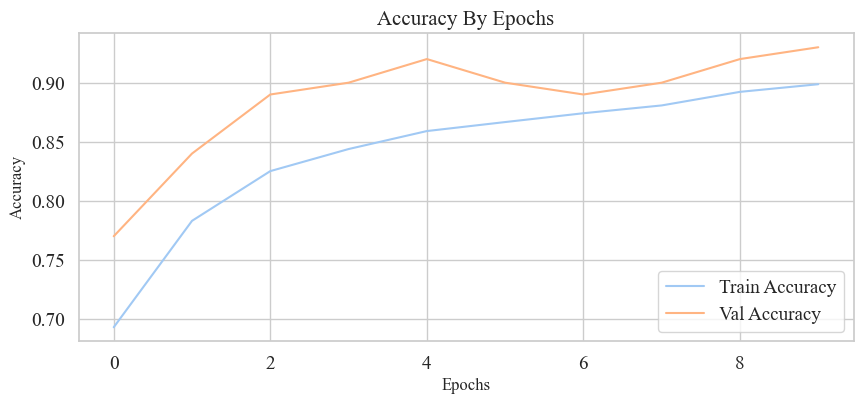

In [26]:
plt.figure(figsize=(10,4))

plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])

plt.title('Accuracy By Epochs',fontsize=15)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.legend(['Train Accuracy','Val Accuracy'])

### 4.4 Model Evaluation on Training and Validation Dataset

In [27]:
yhat_tr = best_mdl.predict(Xtr)
yhat_val = best_mdl.predict(Xval)

yhat_tr = np.where(yhat_tr > 0.5,1,0)
yhat_val = np.where(yhat_val > 0.5,1,0)

print('\n')
print(f'Train Dataset Accuracy : {round(accuracy_score(ytr,yhat_tr)*100,4)} %')

pred_val = [yhat_val[x][0] for x in range(yhat_val.shape[0])]
print(f'Validation Dataset Accuracy : {round(accuracy_score(yval.tolist(),pred_val)*100,4)} %')

4/4 [==============================] - 0s 3ms/step


Train Dataset Accuracy : 93.0891 %
Validation Dataset Accuracy : 93.0 %


In [28]:
best_mdl.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                2800      
                                                                 
 dropout_15 (Dropout)        (None, 40)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                1312      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,145
Trainable params: 4,145
Non-trainable params: 0
_________________________________________________________________


In [29]:
print(classification_report(yval.tolist(),pred_val))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        86
         1.0       0.77      0.71      0.74        14

    accuracy                           0.93       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.93      0.93      0.93       100



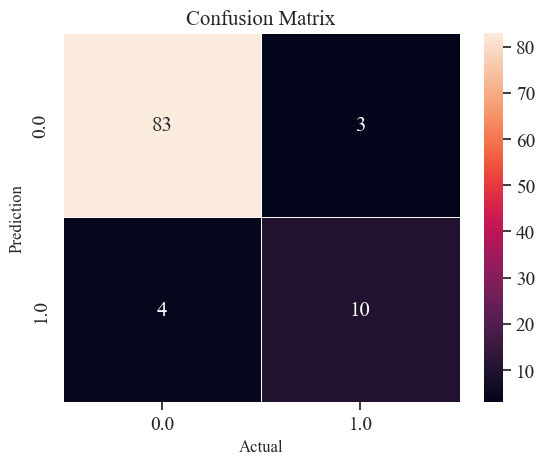

In [30]:
labels = yval.unique().tolist()
labels.sort()
#print(labels)

cm = confusion_matrix(yval.tolist(),pred_val)
#print(cm)

ax = sb.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, linewidth=0.5)
ax.xaxis.tick_bottom()

plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [31]:
#lst = [yhat_val[x][0] for x in range(0,100)]

## 5. Model Save/Export

In [32]:
# Save the entire model as a `.keras` zip archive.
best_mdl.save('mdl_best.keras')

In [33]:
pred_mdl = tensorflow.keras.models.load_model('mdl_best.keras')

pred_mdl.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                2800      
                                                                 
 dropout_15 (Dropout)        (None, 40)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                1312      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,145
Trainable params: 4,145
Non-trainable params: 0
_________________________________________________________________


## 6. Simple Prediction System

### 6.1 PreProcessed Validation Dataset (not FE)

In [34]:
val_pred = pd.read_pickle('cc_valid_pp.pkl')


print(f'Shape of the validation dataset : {val_pred.shape}')
val_pred = val_pred.sample(10)
val_pred

Shape of the validation dataset : (100, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4013,AZ,116,area_code_415,yes,no,0,191.7,97,32.59,176.2,127,14.98,103.9,96,4.68,4.9,4,1.32,2,no
2639,WV,102,area_code_408,no,no,0,234.8,125,39.92,199.2,99,16.93,163.2,88,7.34,10.0,1,2.70,4,no
622,MI,120,area_code_415,no,no,0,150.6,85,25.60,119.0,128,10.12,232.9,123,10.48,6.4,2,1.73,1,no
1217,ND,60,area_code_510,no,no,0,203.2,99,34.54,235.8,131,20.04,224.9,112,10.12,15.1,6,4.08,2,no
394,GA,141,area_code_510,no,yes,23,149.7,112,25.45,162.5,118,13.81,220.3,115,9.91,7.6,2,2.05,3,no
3014,RI,127,area_code_510,no,no,0,211.1,62,35.89,235.2,143,19.99,227.5,66,10.24,15.6,3,4.21,2,no
1882,TX,98,area_code_415,no,no,0,217.2,121,36.92,303.4,73,25.79,197.1,71,8.87,12.4,2,3.35,0,yes
743,IA,128,area_code_408,no,no,0,158.8,75,27.00,264.8,91,22.51,270.0,77,12.15,7.6,7,2.05,1,no
832,MI,45,area_code_510,no,yes,26,91.7,104,15.59,150.6,119,12.80,63.3,103,2.85,7.7,5,2.08,1,no
1626,DE,136,area_code_415,no,no,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3,no


### 6.2 Selected Validation Data

In [35]:
#inp_data = (13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.0014,3.06,0.80,10.0)
#inp_data = np.array(inp_data).reshape(1,-1)

idx = val_pred.sample().index.values
inp = val_pred.loc[idx]

Xval = inp.drop(columns='churn')
yval = inp['churn']

if yval.values[0]=='yes':
    yval = 1
else:
    yval = 0

print(f'Validation Data with Index : {idx[0]} is Selected for Prediction: \n')
for fea, val in zip(Xval.columns.tolist(),Xval.values[0]):
    print(f'"{fea}" --:-- {val}')

Validation Data with Index : 622 is Selected for Prediction: 

"state" --:-- MI
"account_length" --:-- 120
"area_code" --:-- area_code_415
"international_plan" --:-- no
"voice_mail_plan" --:-- no
"number_vmail_messages" --:-- 0
"total_day_minutes" --:-- 150.6
"total_day_calls" --:-- 85
"total_day_charge" --:-- 25.6
"total_eve_minutes" --:-- 119.0
"total_eve_calls" --:-- 128
"total_eve_charge" --:-- 10.12
"total_night_minutes" --:-- 232.9
"total_night_calls" --:-- 123
"total_night_charge" --:-- 10.48
"total_intl_minutes" --:-- 6.4
"total_intl_calls" --:-- 2
"total_intl_charge" --:-- 1.73
"number_customer_service_calls" --:-- 1


### 6.3 PreProcessing Selected Data

In [36]:
pipe2 = load(open('cc_pipe2_val_te.pkl','rb'))

In [37]:
inp_data = pipe2.transform(Xval)
inp_data.shape

(1, 69)

### 6.4 Predction on Selected Data

In [38]:
print(f'------------- Prediction for Validation Data with Index : {idx[0]} --------------------\n')

print(f'Actual "Churn" status for the Selected Data : {yval} \n')

inp_data = tensorflow.convert_to_tensor(inp_data, dtype = tensorflow.float32)
pred = pred_mdl.predict(inp_data, verbose=0)

pred = np.where(pred[0][0] >= 0.5,1,0)              ## extracting probability from ndarray

if (pred == 1):
    print(f'Predicted Churn Status : {pred} (Customer will Churn ...)')
else:
    print(f'Predicted Churn Status : {pred} (Customer will NOT churn ...)')

------------- Prediction for Validation Data with Index : 622 --------------------

Actual "Churn" status for the Selected Data : 0 

Predicted Churn Status : 0 (Customer will NOT churn ...)


### 6.5 All Predictions for the Sample of 10 Observations

In [39]:
Xvall = val_pred.drop(columns='churn')
yvall = val_pred['churn']
ind = Xvall.index.values.tolist()

In [40]:
yvall = yvall.apply(lambda x: 1 if x=='yes' else 0)

In [41]:
Xvall = pipe2.transform(Xvall)
Xvall = tensorflow.convert_to_tensor(Xvall, dtype = tensorflow.float32)

In [42]:
preds = pred_mdl.predict(Xvall, verbose=0)
preds = np.where(preds > 0.5,1,0)

In [43]:
for a,b,c in zip(ind, yvall, preds):
    print(f'Index: {a} --> Actual: {b} --> Predicted: {c[0]}')

Index: 4013 --> Actual: 0 --> Predicted: 0
Index: 2639 --> Actual: 0 --> Predicted: 0
Index: 622 --> Actual: 0 --> Predicted: 0
Index: 1217 --> Actual: 0 --> Predicted: 0
Index: 394 --> Actual: 0 --> Predicted: 0
Index: 3014 --> Actual: 0 --> Predicted: 0
Index: 1882 --> Actual: 1 --> Predicted: 0
Index: 743 --> Actual: 0 --> Predicted: 0
Index: 832 --> Actual: 0 --> Predicted: 0
Index: 1626 --> Actual: 0 --> Predicted: 1
